In [3]:
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.layers import Dense

C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.layers import GlobalAveragePooling2D

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import os

In [17]:
base_model=MobileNet(weights='imagenet')

In [58]:
folder_path='./Pictures/sm/'
directory=os.fsencode(folder_path)
smtrain=[]
for file in os.listdir(directory):
    filename=os.fsdecode(file)
    if filename.endswith('.jpg'):
        img=image.load_img(str(folder_path+filename),target_size=(224,224))
        x=image.img_to_array(img)
        x=preprocess_input(x)
        smtrain.append(x)
        

C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  after removing the cwd from sys.path.


In [59]:
len(smtrain)

20

In [60]:
smtrain=np.stack([sm for sm in smtrain],axis=0)
print(smtrain.shape)

(20, 224, 224, 3)


In [61]:
folder_path='./Pictures/nsm/'
directory=os.fsencode(folder_path)
nsmtrain=[]
for file in os.listdir(directory):
    filename=os.fsdecode(file)
    if filename.endswith('.jpg'):
        img=image.load_img(str(folder_path+filename),target_size=(224,224))
        x=image.img_to_array(img)
        x=preprocess_input(x)
        nsmtrain.append(x)

C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  after removing the cwd from sys.path.


In [62]:
len(nsmtrain)

23

In [63]:
nsmtrain=np.stack([nsm for nsm in nsmtrain],axis=0)
print(nsmtrain.shape)

(23, 224, 224, 3)


In [64]:
xtr=np.concatenate([smtrain,nsmtrain])
print(xtr.shape)

(43, 224, 224, 3)


In [67]:
a=np.ones((20,1))
b=np.zeros((23,1))
ytr=np.concatenate([a,b])
print(ytr.shape)

(43, 1)


In [68]:
perm=list(np.random.permutation(xtr.shape[0]))
xtr=xtr[perm,:,:,:]
ytr=ytr[perm,:]
print(xtr.shape)
print(ytr.shape)

(43, 224, 224, 3)
(43, 1)


In [69]:
for i,layer in enumerate(base_model.layers):
    print(i,str(layer.name))

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_pad_1
6 conv_dw_1
7 conv_dw_1_bn
8 conv_dw_1_relu
9 conv_pw_1
10 conv_pw_1_bn
11 conv_pw_1_relu
12 conv_pad_2
13 conv_dw_2
14 conv_dw_2_bn
15 conv_dw_2_relu
16 conv_pw_2
17 conv_pw_2_bn
18 conv_pw_2_relu
19 conv_pad_3
20 conv_dw_3
21 conv_dw_3_bn
22 conv_dw_3_relu
23 conv_pw_3
24 conv_pw_3_bn
25 conv_pw_3_relu
26 conv_pad_4
27 conv_dw_4
28 conv_dw_4_bn
29 conv_dw_4_relu
30 conv_pw_4
31 conv_pw_4_bn
32 conv_pw_4_relu
33 conv_pad_5
34 conv_dw_5
35 conv_dw_5_bn
36 conv_dw_5_relu
37 conv_pw_5
38 conv_pw_5_bn
39 conv_pw_5_relu
40 conv_pad_6
41 conv_dw_6
42 conv_dw_6_bn
43 conv_dw_6_relu
44 conv_pw_6
45 conv_pw_6_bn
46 conv_pw_6_relu
47 conv_pad_7
48 conv_dw_7
49 conv_dw_7_bn
50 conv_dw_7_relu
51 conv_pw_7
52 conv_pw_7_bn
53 conv_pw_7_relu
54 conv_pad_8
55 conv_dw_8
56 conv_dw_8_bn
57 conv_dw_8_relu
58 conv_pw_8
59 conv_pw_8_bn
60 conv_pw_8_relu
61 conv_pad_9
62 conv_dw_9
63 conv_dw_9_bn
64 conv_dw_9_relu
65 conv_pw_9
66 conv_pw_9_

In [70]:
x=base_model.get_layer('conv_pw_11_relu').output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dense(64,activation='relu')(x)
preds=Dense(1,activation='sigmoid')(x)

In [71]:
model=Model(inputs=base_model.input,outputs=preds)

In [91]:
for layer in base_model.layers[:83]:
    layer.trainable=False
#for layer in base_model.layers[75:]:
#    layer.trainable=True

In [92]:
from keras.optimizers import adam

In [93]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
model.fit(xtr,ytr,epochs=10,batch_size=10)

Epoch 1/10
43/43 [==============================] - 2s 44ms/step - loss: 0.0112 - acc: 1.0000
Epoch 2/10
43/43 [==============================] - 1s 27ms/step - loss: 0.0070 - acc: 1.0000
Epoch 3/10
43/43 [==============================] - 1s 26ms/step - loss: 0.0225 - acc: 1.0000
Epoch 4/10
43/43 [==============================] - 1s 26ms/step - loss: 0.0933 - acc: 0.9535
Epoch 5/10
43/43 [==============================] - 1s 26ms/step - loss: 0.1055 - acc: 0.9535
Epoch 6/10
43/43 [==============================] - 1s 27ms/step - loss: 9.2967e-04 - acc: 1.0000
Epoch 7/10
43/43 [==============================] - 1s 27ms/step - loss: 0.2658 - acc: 0.8605
Epoch 8/10
43/43 [==============================] - 1s 26ms/step - loss: 0.0473 - acc: 0.9767
Epoch 9/10
43/43 [==============================] - 1s 26ms/step - loss: 9.2257e-04 - acc: 1.0000
Epoch 10/10
43/43 [==============================] - 1s 26ms/step - loss: 7.9016e-04 - acc: 1.0000


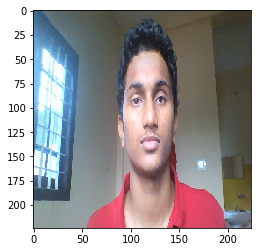

In [95]:
img=image.load_img('./Pictures/smmm.jpg',target_size=(224,224))
plt.imshow(img)

In [96]:
x=image.img_to_array(img)
x=preprocess_input(x).reshape(1,224,224,3)

In [97]:
prediction=model.predict(x)
model.predict(x)

array([[0.0542001]], dtype=float32)

In [98]:
if prediction[0,0]>0.5:
    print('smiling')
else:
    print('not smiling')

not smiling


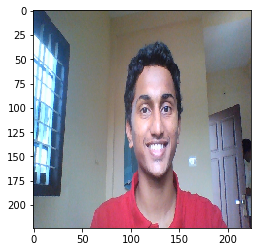

In [99]:
img=image.load_img('./Pictures/smm.jpg',target_size=(224,224))
plt.imshow(img)

In [100]:
x=image.img_to_array(img)
x=preprocess_input(x).reshape(1,224,224,3)

In [101]:
prediction=model.predict(x)

In [102]:
if prediction[0,0]>0.5:
    print('smiling')
else:
    print('not smiling')

smiling
